### grp

# Course: _Software Engineering for Data Scientists in Python_:
1.  software engineering + data science
2.  python modules
3.  classes
4.  maintainability

## _1. Software Engineering & Data Science_:
-  PyPi => python package index containing published packages
-  PEP8 => de facto style for python code best practices (ex: **pip install pycodestyle** checks a .py file for PEP8 compliance)
-  ways to write modular code:
    -  packages
    -  classes
    -  methods

#### using numpy package class and method

In [1]:
# import the numpy package
import numpy as np

# create an array class object
arr = np.array([8, 6, 7, 5, 3, 0, 9])

# use the sort method
arr.sort()

# print the sorted array
print(arr)

[0 3 5 6 7 8 9]


#### documentation help

In [2]:
# load the Counter function into our environment
from collections import Counter

# View the documentation for Counter.most_common
help(Counter.most_common)

Help on function most_common in module collections:

most_common(self, n=None)
    List the n most common elements and their counts from the most
    common to the least.  If n is None, then list all element counts.
    
    >>> Counter('abcdeabcdabcaba').most_common(3)
    [('a', 5), ('b', 4), ('c', 3)]



In [3]:
words = ["a", "b", "c", "a", "a", "x", "y", "z"]

# Use Counter to find the top 5 most common words
top_5_words = Counter(words).most_common(5)

# Display the top 5 most common words
print(top_5_words)

[('a', 3), ('b', 1), ('c', 1), ('x', 1), ('y', 1)]


#### PEP8 compliance

In [4]:
# Import needed package
import pycodestyle

# Create a StyleGuide instance
style_checker = pycodestyle.StyleGuide()

# Run PEP 8 check on multiple files
result = style_checker.check_files(['nay_pep8.py', 'yay_pep8.py'])

# Print result of PEP 8 style check
print(result.messages)

nay_pep8.py:1:1: E265 block comment should start with '# '
nay_pep8.py:2:6: E225 missing whitespace around operator
nay_pep8.py:4:2: E131 continuation line unaligned for hanging indent
nay_pep8.py:5:6: E131 continuation line unaligned for hanging indent
nay_pep8.py:6:1: E122 continuation line missing indentation or outdented
nay_pep8.py:7:1: E265 block comment should start with '# '
nay_pep8.py:8:1: E402 module level import not at top of file
nay_pep8.py:9:1: E265 block comment should start with '# '
nay_pep8.py:10:1: E302 expected 2 blank lines, found 0
nay_pep8.py:10:18: E231 missing whitespace after ','
nay_pep8.py:11:2: E111 indentation is not a multiple of four
nay_pep8.py:12:2: E111 indentation is not a multiple of four
nay_pep8.py:14:1: E265 block comment should start with '# '
nay_pep8.py:15:1: E305 expected 2 blank lines after class or function definition, found 1
nay_pep8.py:16:11: E111 indentation is not a multiple of four
nay_pep8.py:16:17: E225 missing whitespace around op

## _2. Writing a Python Module_:
-  package modules:
    -  https://www.python.org/dev/peps/pep-0008/#package-and-module-name
    -  **______init__.py** => lets python know directory created is a package (allows package to be imported)
-  package portability:
    -  **setup.py** => contains metadata like package name, version, description, author, and required package versions / sub-packages so ***one can pip install package / publish it to PyPi***
    -  **requirements.txt** => list of python package version numbers and dependencies

#### package functionality

In [5]:
! ls .

Software Engineering for Data Scientists in Python.ipynb
nay_pep8.py
requirements.txt
setup.py
tests
text_analyzer
yay_pep8.py


In [6]:
! ls text_analyzer/

__init__.py      document.py      social_media.py
__pycache__      filter_utils.py  token_utils.py
counter_utils.py parser.py        tweets.py


In [7]:
! cat text_analyzer/counter_utils.py

# Import needed functionality
from collections import Counter

def plot_counter(counter, n_most_common=5):
  # Subset the n_most_common items from the input counter
  top_items = counter.most_common(n_most_common)
  # Plot `top_items`
  plot_counter_most_common(top_items)

# Import needed functionality
import matplotlib.pyplot as plt

def plot_counter_most_common(top_items):
    top_items_dict = dict(top_items)
    plt.figure()
    plt.bar(range(len(top_items_dict)), list(top_items_dict.values()), align='center')
    plt.xticks(range(len(top_items_dict)), list(top_items_dict.keys()), rotation='vertical')
    plt.tight_layout()
    plt.show()

# Import needed functionality
from collections import Counter

def sum_counters(counters):
  # Sum the inputted counters
  return sum(counters, Counter())

In [8]:
! cat text_analyzer/__init__.py

from .counter_utils import plot_counter, sum_counters, plot_counter_most_common
from .token_utils import tokenize
from .filter_utils import filter_word_counts
from .document import Document
from .parser import Parser
from .social_media import SocialMedia
from .tweets import Tweets

In [9]:
from text_analyzer import plot_counter, sum_counters, plot_counter_most_common

In [10]:
word_counts = [Counter({'AutoML': 3,
          'DataCamp': 1,
          'H': 2,
          'In': 1,
          'Introduction': 1,
          'O': 2,
          'a': 1,
          'about': 1,
          'and': 1,
          'auto': 1,
          'glimpse': 1,
          'have': 1,
          'its': 1,
          'learn': 1,
          'of': 1,
          'this': 1,
          'to': 1,
          'tutorial': 1,
          'will': 1,
          'you': 1}),
 Counter({'DataCamp': 4,
          'Hacking': 7,
          'Learn': 1,
          'Significance': 1,
          'Stocks': 1,
          'Testing': 1,
          'and': 1,
          'co': 1,
          'data': 1,
          'how': 1,
          'manipulate': 1,
          'p': 1,
          'pandas': 11,
          'series': 1,
          'time': 1,
          'to': 1,
          'with': 1}),
 Counter({'#DataCamp': 1,
          '#DataScience': 1,
          '#Python': 1,
          '#sklearn': 6,
          '@cbismuth': 1,
          'Linear': 1,
          'RT': 1,
          'detection': 1,
          'example': 1,
          'features': 1,
          'most': 1,
          'regression': 1,
          'significant': 1,
          'with': 1})]

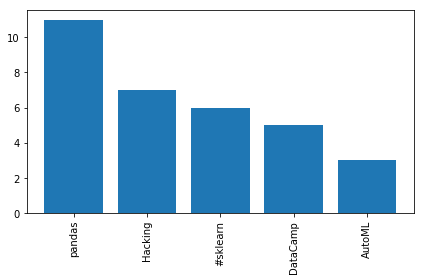

In [11]:
# Import local package
import text_analyzer

# Sum word_counts using sum_counters from text_analyzer
word_count_totals = text_analyzer.sum_counters(word_counts)

# Plot word_count_totals using plot_counter from text_analyzer
text_analyzer.plot_counter(word_count_totals)

#### sample requirements.txt

In [12]:
# pip install -r requirements.txt
! cat requirements.txt

matplotlib>=3.0.0
numpy==1.15.4
pandas<=0.22.0
pycodestyle

#### create setup.py

In [13]:
! cat setup.py

# Import needed function from setuptools
from setuptools import setup

# Create proper setup to be used by pip
setup(name='text_analyzer',
      version='0.0.1',
      description='Perform and visualize a text anaylsis.',
      author='username',
      packages=['text_analyzer'],
      install_requires=['matplotlib>=3.0.0'])

#### package dir

In [14]:
! ls .

Software Engineering for Data Scientists in Python.ipynb
nay_pep8.py
requirements.txt
setup.py
tests
text_analyzer
yay_pep8.py


## _3. Utilizing Classes_:
-  **______init__** => builds instance of class
-  ***self*** => represents instance of the class with access to attributes and methods of the class
-  ***method*** => functions associated with an object
-  ***attribute*** => variables (value) stored within an object
-  ***non-public methods*** => develop with leading _ (___intended for method to only to be used inside the package___) => _tokenize()

#### create class

In [15]:
! cat text_analyzer/document.py

# Define Document class
class Document:
    """A class for text analysis
    
    :param text: string of text to be analyzed
    :ivar text: string of text to be analyzed; set by `text` parameter
    """
    # Method to create a new instance of MyClass
    def __init__(self, text):
        # Store text parameter to the text attribute
        self.text = text

In [16]:
datacamp_tweet = 'Basic linear regression example. #DataCamp #DataScience #Python #sklearn'

# Import custom text_analyzer package
import text_analyzer

# Create an instance of Document with datacamp_tweet
my_document = text_analyzer.Document(text=datacamp_tweet)

# Print the text attribute of the Document instance
print(my_document.text)

Basic linear regression example. #DataCamp #DataScience #Python #sklearn


#### non-public method

In [17]:
! cat text_analyzer/parser.py

# Import needed functionality
from .token_utils import tokenize
from collections import Counter

class Parser:
  def __init__(self, text):
    self.text = text
    # pre tokenize the document with non-public tokenize method
    self.tokens = self._tokenize()
    # pre tokenize the document with non-public count_words
    self.word_counts = self._count_words()

  def _tokenize(self):
    return tokenize(self.text)

  # non-public method to tally document's word counts with Counter
  def _count_words(self):
    return Counter(self.tokens)

In [18]:
datacamp_tweets = """
[DataCamp] Introduction to H2O AutoML --> In this tutorial, you will learn about H2O and have a glimpse of its auto…
\n[DataCamp] Stocks, Significance Testing & p-Hacking --> Learn how to manipulate time series data with pandas and co…
\nRT @cbismuth: Linear regression example with most significant features detection. #DataCamp #DataScience #Python #sklearn …
\nLinear regression example with most significant features detection. #DataCamp #DataScience #Python #sklearn\nBasic linear regression example. #DataCamp #DataScience #Python #sklearn
\nRT @David_Makinde_: I just completed Introduction to Python for Data Science 
\n#Datacamp\n#DataScience \n#Python\n[DataCamp]
"""

# create a new document instance from datacamp_tweets
datacamp_doc = text_analyzer.Parser(datacamp_tweets)

# print the first 5 tokens from datacamp_doc
print(datacamp_doc.tokens[:5])

# print the top 5 most used words in datacamp_doc
print(datacamp_doc.word_counts.most_common(5))

['[DataCamp]', 'Introduction', 'to', 'H', 'O']
[('#DataScience', 4), ('#Python', 4), ('[DataCamp]', 3), ('to', 3), ('with', 3)]


#### inheritance

In [19]:
! cat text_analyzer/social_media.py

# Define a SocialMedia class that is a child of the `Parser class`

# Import needed functionality
from .filter_utils import filter_word_counts
from .parser import Parser

class SocialMedia(Parser):
    def __init__(self, text):
        Parser.__init__(self, text)
        self.hashtag_counts = self._count_hashtags()
        self.mention_counts = self._count_mentions()
        
    def _count_hashtags(self):
        # Filter attribute so only words starting with '#' remain
        return filter_word_counts(self.word_counts, first_char='#')
    
    def _count_mentions(self):
        # Filter attribute so only words starting with '@' remain
        return filter_word_counts(self.word_counts, first_char='@')

#### use child class

[('@ascentt', 1), ('@DataCamp', 1), ('@AWS', 1)]


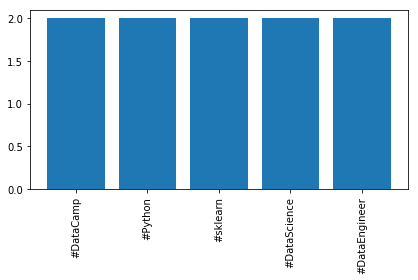

In [20]:
datacamp_tweets = """
#DataCamp #Python #sklearn\nMy pretty first classifier! 
#DataCamp #Python #sklearn\nRT @ascentt: The different 
#DataScience roles on the job market. 
\n\n\n\n#SoftwareEngineer #DataEngineer #DataScientist #…
\nThe different #DataScience roles on the job market.
\n\n\n\n#SoftwareTesting #DataEngineer @DataCamp @AWS
"""

# Import custom text_analyzer package
import text_analyzer

# Create a SocialMedia instance with datacamp_tweets
dc_tweets = text_analyzer.SocialMedia(text=datacamp_tweets)

# Print the top five most most mentioned users
print(dc_tweets.mention_counts.most_common(5))

# Plot the most used hashtags
text_analyzer.plot_counter(dc_tweets.hashtag_counts)

#### class methods

In [21]:
# Import needed package
import text_analyzer

# Create instance of document
my_doc = text_analyzer.Parser(datacamp_tweets)

In [22]:
dir(my_doc)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_count_words',
 '_tokenize',
 'text',
 'tokens',
 'word_counts']

In [23]:
# Import needed package
import text_analyzer

# Create instance of document
my_doc = text_analyzer.Parser(datacamp_tweets)

# Run help on my_doc's tokens method
help(my_doc.tokens)

# Plot the tokens of my_doc
my_doc.tokens

Help on list object:

class list(object)
 |  list() -> new empty list
 |  list(iterable) -> new list initialized from iterable's items
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __le__(self, value, /

['#DataCamp',
 '#Python',
 '#sklearn',
 'My',
 'pretty',
 'first',
 'classifier',
 '#DataCamp',
 '#Python',
 '#sklearn',
 'RT',
 '@ascentt',
 'The',
 'different',
 '#DataScience',
 'roles',
 'on',
 'the',
 'job',
 'market',
 '#SoftwareEngineer',
 '#DataEngineer',
 '#DataScientist',
 'The',
 'different',
 '#DataScience',
 'roles',
 'on',
 'the',
 'job',
 'market',
 '#SoftwareTesting',
 '#DataEngineer',
 '@DataCamp',
 '@AWS']

#### grandchild class

In [24]:
! cat text_analyzer/tweets.py

# Import needed functionality
from .filter_utils import filter_lines
from .parser import Parser
from .social_media import SocialMedia

# Define a Tweet class that inherits from SocialMedia
class Tweets(SocialMedia):
    def __init__(self, text):
        # Call parent's __init__ with super()
        super().__init__(text)
        # Define retweets attribute with non-public method
        self.retweets = self._process_retweets()

    def _process_retweets(self):
        # Filter tweet text to only include retweets
        retweet_text = filter_lines(self.text, first_chars='RT')
        # Return retweet_text as a SocialMedia object
        return SocialMedia(retweet_text)

#### use inherited methods

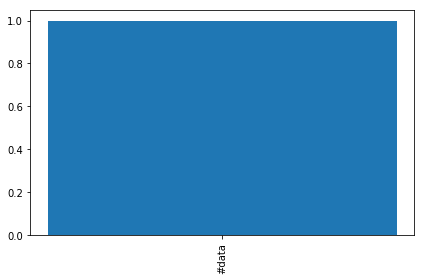

RT @mona_khm: 


In [25]:
datacamp_tweets = """
They emphasise the famous Venn diagram is of Data Science, 
n…\nNew Course by @NicholasStrayer: Visualization Best Practices in R! 
This course will help you take your #data…\nRT @mona_khm: 
I wrote a post for @DataCamp
"""
# Import needed package
import text_analyzer

# Create instance of Tweets
my_tweets = text_analyzer.Tweets(datacamp_tweets)

# Plot the most used hashtags in the tweets
text_analyzer.plot_counter(my_tweets.hashtag_counts)

print(my_tweets.retweets.text)

In [26]:
dir(my_tweets)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_count_hashtags',
 '_count_mentions',
 '_count_words',
 '_process_retweets',
 '_tokenize',
 'hashtag_counts',
 'mention_counts',
 'retweets',
 'text',
 'tokens',
 'word_counts']

## _4. Maintainability_:
-  Documentation:
    -  comments
    -  docstrings
    -  separate folder at package level testing scripts (***doctest***, ***pytest***)
-  Zen of Python => ***import this***

#### comments

In [27]:
text = "Our competitor pricing is $10.50 an inch. Our price is $125.00 a foot."

import re

def extract_0(text):
    # match and extract dollar amounts from the text
    return re.findall(r'\$\d+\.\d\d', text)

def extract_1(text):
    # return all matches to regex pattern
    return re.findall(r'\$\d+\.\d\d', text)

# Print the text
print(text)

# Print the results of the function with better commenting
print(extract_0(text))

Our competitor pricing is $10.50 an inch. Our price is $125.00 a foot.
['$10.50', '$125.00']


#### view docstrings

In [28]:
def mary(white_as='snow'):
    """How white was mary's little lamb?

    >>> mary(white_as='salt')
    'Mary had a little lamb whose fleece was white as salt'
    """
    return "Mary had a little lamb whose fleece was white as {}".format(white_as)

In [29]:
help(mary)

Help on function mary in module __main__:

mary(white_as='snow')
    How white was mary's little lamb?
    
    >>> mary(white_as='salt')
    'Mary had a little lamb whose fleece was white as salt'



In [30]:
def rapunzel(hair_len=20):
    """Lets down hair from tower to be used as climbing rope

    :param hair_len: length of hair (cannot be negative)
    :return: strand of hair that is hair_len characters long

    >>> rapunzel(hair_len=15)
    '~~~~~~~~~~~~~~~'
    """
    if hair_len < 0:
        ValueError('hair_len cannot be negative!')

    return "~" * hair_len

In [31]:
help(rapunzel)

Help on function rapunzel in module __main__:

rapunzel(hair_len=20)
    Lets down hair from tower to be used as climbing rope
    
    :param hair_len: length of hair (cannot be negative)
    :return: strand of hair that is hair_len characters long
    
    >>> rapunzel(hair_len=15)
    '~~~~~~~~~~~~~~~'



#### writing a docstring

In [32]:
# Complete the function's docstring
def tokenize(text, regex=r'[a-zA-z]+'):
  """Split text into tokens using a regular expression

  :param text: text to be tokenized
  :param regex: regular expression used to match tokens using re.findall 
  :return: a list of resulting tokens

  >>> tokenize('the rain in spain')
  ['the', 'rain', 'in', 'spain']
  """
  return re.findall(regex, text, flags=re.IGNORECASE)

# Print the docstring
help(tokenize)

Help on function tokenize in module __main__:

tokenize(text, regex='[a-zA-z]+')
    Split text into tokens using a regular expression
    
    :param text: text to be tokenized
    :param regex: regular expression used to match tokens using re.findall 
    :return: a list of resulting tokens
    
    >>> tokenize('the rain in spain')
    ['the', 'rain', 'in', 'spain']



#### good function name example

In [33]:
def hypotenuse_length(leg_a, leg_b):
    """Find the length of a right triangle's hypotenuse

    :param leg_a: length of one leg of triangle
    :param leg_b: length of other leg of triangle
    :return: length of hypotenuse
    
    >>> hypotenuse_length(3, 4)
    5
    """
    import math
    return math.sqrt(leg_a**2 + leg_b**2)

  
# Print the length of the hypotenuse with legs 6 & 8
print(hypotenuse_length(6, 8))

10.0


#### good variable name example

In [34]:
from statistics import mean

# Sample measurements of pupil diameter in mm
pupil_diameter = [3.3, 6.8, 7.0, 5.4, 2.7]

# Average pupil diameter from sample
mean_diameter = mean(pupil_diameter)

print(mean_diameter)

5.04


#### code refactoring (smaller functions)

In [35]:
import math 

def polygon_perimeter(n_sides, side_len):
    return n_sides * side_len

def polygon_apothem(n_sides, side_len):
    denominator = 2 * math.tan(math.pi / n_sides)
    return side_len / denominator

def polygon_area(n_sides, side_len):
    perimeter = polygon_perimeter(n_sides, side_len)
    apothem = polygon_apothem(n_sides, side_len)

    return perimeter * apothem / 2

# Print the area of a hexagon with legs of size 10
print(polygon_area(n_sides=6, side_len=10))

259.80762113533166


#### doctest

In [36]:
import doctest
import text_analyzer
from collections import Counter

def sum_counters(counters):
    """Aggregate collections.Counter objects by summing counts

    :param counters: list/tuple of counters to sum
    :return: aggregated counters with counts summed

    >>> d1 = text_analyzer.Parser('1 2 fizz 4 buzz fizz 7 8')
    >>> d2 = text_analyzer.Parser('fizz buzz 11 fizz 13 14')
    >>> sum_counters([d1.word_counts, d2.word_counts])
    Counter({'fizz': 4, 'buzz': 2})
    """
    return sum(counters, Counter())

#doctest.testmod()

#### pytest

In [37]:
! cat tests/test_social_media.py

from collections import Counter
from text_analyzer import SocialMedia

# Create an instance of SocialMedia for testing
test_post = 'learning #python & #rstats is awesome! thanks @datacamp!'
sm_post = SocialMedia(test_post)

# Test hashtag counts are created properly
def test_social_media_hashtags():
    expected_hashtag_counts = Counter({'#python': 1, '#rstats': 1})
    assert sm_post.hashtag_counts == expected_hashtag_counts

#### sphinx
-  http://www.sphinx-doc.org/en/master/

#### final package dir structure

In [38]:
! ls

Software Engineering for Data Scientists in Python.ipynb
nay_pep8.py
requirements.txt
setup.py
tests
text_analyzer
yay_pep8.py


### grp